In [6]:
!pip install tensorflow

## Importing Libraries

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt #For visualization
import pandas as pd
import seaborn as sns

## Data Pre-Processing

### Training Image Pre-Processing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'train', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 458 files belonging to 2 classes.


In [9]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

### Validation Image Pre-Processing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'valid', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 246 files belonging to 2 classes.


In [11]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

### Test Image Pre-Precessing

In [12]:
test_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'test', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 79 files belonging to 1 classes.


In [13]:
test_set #128,128=Width and hieght, 3=RGB format of the array, 2=Examples in one batch

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Building Model

### Importing Libraries

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dense, Flatten #For convolution operations
from tensorflow.keras.models import Model #We use Functional API model so, this is it object
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

## Input Layer

In [15]:
inputs = Input(shape=(128, 128, 3))

### Building Convolution Layer

In [16]:
x = Conv2D(32, (5, 5), padding='same', kernel_regularizer=l2(0.001), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)

In [17]:
x = Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

In [18]:
x = Conv2D(64, (5, 5), padding='valid', kernel_regularizer=l2(0.001), activation='elu')(x)
x = Conv2D(64, (3, 3), padding='valid', kernel_regularizer=l2(0.001), activation='elu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

In [19]:
x = Conv2D(128, (3, 3), padding='valid', kernel_regularizer=l2(0.001), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

### Adding Flatten Layer

In [20]:
x = Flatten()(x)

### Adding Dense Layer

In [21]:
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x) #Units=number of neurons in the dense layer (Hidden laye)

### Adding Output Layer

In [22]:
outputs = Dense(2, activation='softmax')(x) #Using softmax we can get result as probability

### Create Model

In [23]:
model = Model(inputs=inputs, outputs=outputs)

## Compiling Model

In [24]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,874,114 (7.15 MB)

 Trainable params: 1,874,114 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [26]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10) #By equal whole thing to training_history, it can easy to do visualization in future
#When runing this if loss is incraesed instead of decreasing its because of overshooting loss function
#This can happen because of high learning rate. Default 0.001 turn into o.ooo1 (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
#There may be a chance of underfitiing. So increase number of neurons or can add more convolution layers.

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.5513 - loss: 19.0419 - val_accuracy: 0.5569 - val_loss: 2.6197
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.7309 - loss: 1.6053 - val_accuracy: 0.5610 - val_loss: 1.6250
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.7412 - loss: 1.3771 - val_accuracy: 0.7195 - val_loss: 1.4280
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - accuracy: 0.8050 - loss: 1.2913 - val_accuracy: 0.5813 - val_loss: 1.5252
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.7759 - loss: 1.2608 - val_accuracy: 0.6911 - val_loss: 1.3565
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.8253 - loss: 1.1880 - val_accuracy: 0.6463 - val_loss: 1.5022
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.8689 - loss: 1.1102 - val_accuracy: 0.6829 - val_loss: 1.3846
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.8586 - loss: 1.0926 - val_accuracy: 0

## Model Evaluation

### Model Evaluation on Training Set

In [27]:
train_loss_acc = model.evaluate(training_set)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8209 - loss: 1.1261


### Model Evaluation on Training Set

In [28]:
valid_loss_acc = model.evaluate(validation_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6960 - loss: 1.5053


## Saving Model

In [30]:
model.save("trained_model2.keras")

## Visualization

In [31]:
training_history.history

{'accuracy': [0.5502183437347412,
  0.7008733749389648,
  0.7401746511459351,
  0.7925764322280884,
  0.8034934401512146,
  0.8406113386154175,
  0.8493449687957764,
  0.8602620363235474,
  0.8908296823501587,
  0.9104803204536438],
 'loss': [10.891117095947266,
  1.5763680934906006,
  1.3724524974822998,
  1.3110593557357788,
  1.2474249601364136,
  1.1766619682312012,
  1.1309080123901367,
  1.0925930738449097,
  1.0384538173675537,
  0.9921094179153442],
 'val_accuracy': [0.5569105744361877,
  0.5609756112098694,
  0.7195122241973877,
  0.5813007950782776,
  0.6910569071769714,
  0.6463414430618286,
  0.6829268336296082,
  0.6991869807243347,
  0.7113820910453796,
  0.7195122241973877],
 'val_loss': [2.6196632385253906,
  1.6250149011611938,
  1.4279755353927612,
  1.5252070426940918,
  1.3564947843551636,
  1.5022149085998535,
  1.3846019506454468,
  1.3670778274536133,
  1.4555304050445557,
  1.4729543924331665]}

## Recording History in json

In [32]:
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

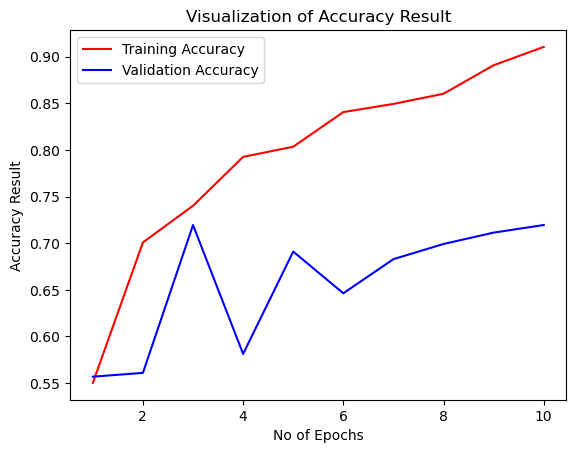

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Other Matrics For Model Evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Disease', 'Healthy']

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'valid', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=False, #Change in to false to pass it sequentialy
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 246 files belonging to 2 classes.


In [36]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


(array([[9.40150619e-02, 9.05984938e-01],
        [2.14365125e-01, 7.85634816e-01],
        [1.56788364e-01, 8.43211591e-01],
        [1.81659814e-02, 9.81833994e-01],
        [3.68951596e-02, 9.63104784e-01],
        [1.38507888e-01, 8.61492097e-01],
        [8.04864466e-02, 9.19513524e-01],
        [2.50557791e-02, 9.74944174e-01],
        [9.99674439e-01, 3.25520872e-04],
        [4.93205562e-02, 9.50679421e-01],
        [3.74514572e-02, 9.62548554e-01],
        [1.25814646e-01, 8.74185383e-01],
        [4.57337737e-01, 5.42662263e-01],
        [9.54985097e-02, 9.04501438e-01],
        [9.82316434e-01, 1.76835489e-02],
        [1.64762009e-02, 9.83523786e-01],
        [6.34063542e-01, 3.65936458e-01],
        [2.16392219e-01, 7.83607841e-01],
        [6.99507073e-02, 9.30049241e-01],
        [1.30156241e-02, 9.86984372e-01],
        [9.50942039e-01, 4.90579493e-02],
        [3.11692625e-01, 6.88307405e-01],
        [2.02935547e-01, 7.97064483e-01],
        [1.57521486e-01, 8.4247851

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1) #Return the maximum value and its index
predicted_categories

<tf.Tensor: shape=(246,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)>

In [38]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(246, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]

In [39]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(246,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)>

In [40]:
from sklearn.metrics import classification_report, confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [41]:
print(classification_report(y_true, predicted_categories, target_names=class_name)) #sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

     Disease       0.86      0.59      0.70       137
     Healthy       0.63      0.88      0.74       109

    accuracy                           0.72       246
   macro avg       0.75      0.74      0.72       246
weighted avg       0.76      0.72      0.72       246



### Confusion Matrix

In [42]:
cm = confusion_matrix(y_true, predicted_categories)
cm.shape

(2, 2)

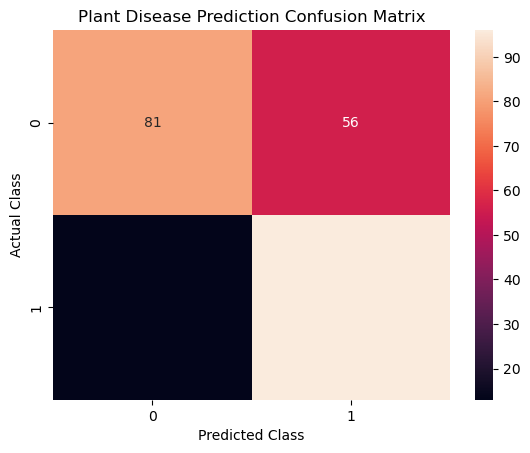

In [43]:
sns.heatmap(cm, annot=True) #https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Plant Disease Prediction Confusion Matrix")
plt.show()